<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [ ]:
# type your code here

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the Life expectancy dataset and display the first five records 

In [16]:
# load the csv file

# type your code here
df = pd.read_csv('Life_Expectancy.csv')
# display the first five observations

# type your code here
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,NaN,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,NaN,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,NaN,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,NaN,3.300000,3.300000,0.784000,13.900000,76.400000


#### Check the shape of the data and display its information

In [4]:
# check the size of the dataframe
df.shape

(182, 20)

In [5]:
# display dataset information understand the dataset

# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
df['Life_Expectancy'].isnull().sum()

0

In [18]:
na_data = df['Life_Expectancy'].isnull()

In [20]:
na_data.index[na_data == True].tolist()

[46, 100, 104, 111, 118, 122, 135, 138, 168]

In [25]:
df = df.drop(df.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]])

In [28]:
df.shape

(173, 20)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        0
Infant_Deaths          0
Alcohol              166
Hepatitis B            9
Measles                0
BMI                    2
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   21
Population            34
Malnourished10_19      2
Malnourished5_9        2
Income_Index           7
Schooling              7
Life_Expectancy        0
dtype: int64

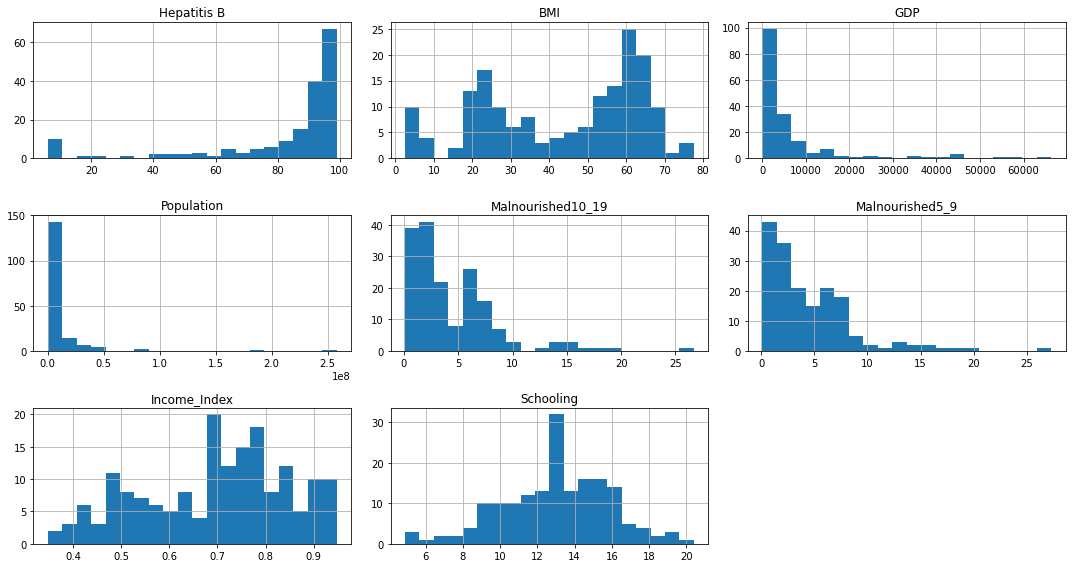

In [46]:
df_missing_values = df[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling']]

# plot histogram of all variables which have missing values
# set the number of bins to 20
# set the figure size using 'figsize'
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [34]:
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())

In [35]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [36]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())

In [37]:
df['Population'] = df['Population'].fillna(df['Population'].median())

In [38]:
df['Malnourished10_19'] = df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())

In [39]:
df['Malnourished5_9'] = df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())

In [40]:
df['Income_Index'] = df['Income_Index'].fillna(df['Income_Index'].mean())

In [41]:
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [42]:
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        0
Infant_Deaths          0
Alcohol              166
Hepatitis B            0
Measles                0
BMI                    0
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                    0
Population             0
Malnourished10_19      0
Malnourished5_9        0
Income_Index           0
Schooling              0
Life_Expectancy        0
dtype: int64

In [44]:
df.drop('Alcohol', axis=1, inplace=True)

In [45]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here
df.describe(include='object')

,Country,Status
count,173,173
unique,173,2
top,Afghanistan,Developing
freq,1,141


In [48]:
df.drop('Country', axis=1, inplace=True)

In [49]:
df.describe()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9663690.310289,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,26505222.081520,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2966.000000,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,587482.000000,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343998,2174645.000000,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7177991.000000,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,258162113.000000,26.700000,27.300000,0.948000,20.400000,88.000000


In [50]:
df['Year'].value_counts()

2015    172
2013      1
Name: Year, dtype: int64

In [51]:
df.drop('Year', axis=1, inplace=True)

In [52]:
df.drop('Infant_Deaths', axis=1, inplace=True)

In [53]:
df.shape

(173, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
df['Status'] = pd.get_dummies(data=df['Status'],drop_first=True)

In [55]:
df.head()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.000000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,1,74.000000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,1,19.000000,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,1,335.000000,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,1,13.000000,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
X = df.iloc[:,:15]
X = sm.add_constant(X)
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
MLR_model = sm.OLS(y_train, X_train).fit()


<AxesSubplot:>

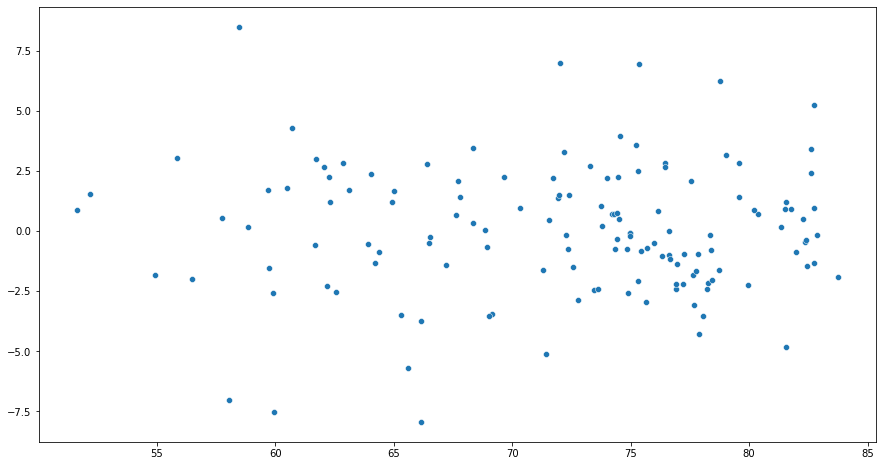

In [58]:
y_pred = MLR_model.fittedvalues
residuals = MLR_model.resid
sns.scatterplot(x=y_pred,y= residuals)

In [ ]:
# There is no pattern seen in the scatterplot hence the data contains constant variance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
X = df.iloc[:,[2,6,7]]
y = df['Life_Expectancy']

linreg = LinearRegression()
MLR_model = linreg.fit(X,y)
y_pred = MLR_model.predict(X)
residual = np.array(y - y_pred)

unexplained_var = np.sum(residual**2)
print(unexplained_var)

7272.4649163342965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here
X = df.iloc[:,[11,12]]
X = sm.add_constant(X)
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
MLR_model = sm.OLS(y_train, X_train).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     19.66
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.20e-08
Time:                        11:15:31   Log-Likelihood:                -466.03
No. Observations:                 138   AIC:                             938.1
Df Residuals:                     135   BIC:                             946.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.3070      0.916     83.320      0.000      74.496      78.118
Malnourished10_19    -0.5024      0.769     -0.654      0.514      -2.023       1.018
Malnourished5_9      -0.3930      0.754     -0.521      0.603      -1.884       1.098
==============================================================================
Omnibus:                        6.049   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.225
Skew:                          -0.512   Prob(JB):                       0.0445
Kurtosis:                       2.820   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
X = df.iloc[:,1].values
X = X.reshape(-1,1)

# set the dependent variable
y = df['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [62]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train,y_train)
linpred = MLR_model.predict(X_train)

In [63]:
sgd = SGDRegressor()
MLR_model_sgd = sgd.fit(X_train,y_train)
sgdpred = MLR_model_sgd.predict(X_train)

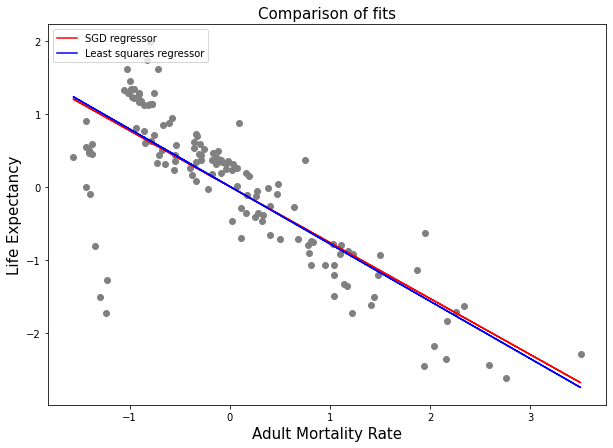

In [64]:
# set the figure size 
plt.figure(figsize=(10,7))

# plot the scatter plot
# colors: set the color of the points in the scatter plot
plt.scatter(X_train, y_train,color='grey')

# set xlabel for the plot
plt.xlabel("Adult Mortality Rate",fontsize = 15)

# set ylabel for the plot
plt.ylabel("Life Expectancy",fontsize = 15)

# set title for the plot
plt.title("Comparison of fits",fontsize = 15)

# plot the regression line for the two models
# color: set the color of the line
# label: set the label of the line for the legend
plt.plot(X_train,sgdpred,color='red',label='SGD regressor')
plt.plot(X_train,linpred,color='blue',label='Least squares regressor')

# set the position of legend
plt.legend(loc='upper left')

# disply the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# type your code here
X = df.iloc[:,[2,6,7]]


# set the dependent variable
y = df['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [69]:
sgd1 = SGDRegressor()
MLR_model_sgd1 = sgd1.fit(X_train,y_train)

In [70]:
linreg = LinearRegression()
MLR_model1 = linreg.fit(X_train,y_train)

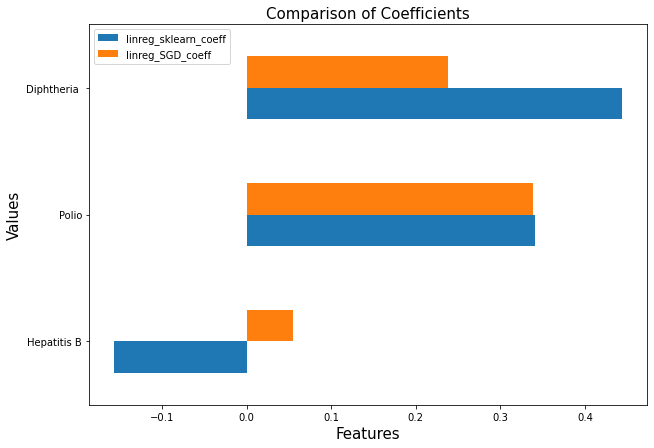

In [71]:
df_immunization=df.iloc[:,[2,6,7]]

df_coeff = pd.DataFrame([MLR_model1.coef_, MLR_model_sgd1.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])

fig = df_coeff.T.plot.barh( figsize=(10,7))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper left')

# display the plot
plt.show()

In [ ]:
# For polio both the model interpretations are nearly similar
# For diptheria the linreg coeff are higher than SGD.
# For hepatitis B the SGD coeff are higher and the lin reg coeff have gone towards negative.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

linreg = LinearRegression()
MLR_model2 = linreg.fit(X_train,y_train)

In [79]:
# Train
train_pred = MLR_model2.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)

In [80]:
# Test
test_pred = MLR_model2.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

In [81]:
print(mse_train,rmse_train)
print(mse_test,rmse_test)

7.0590856828921575 2.6569
11.72600488499266 3.4243


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
# Yes we can use linear regression because the target variable is numerical and is dependent on independent variables

<AxesSubplot:>

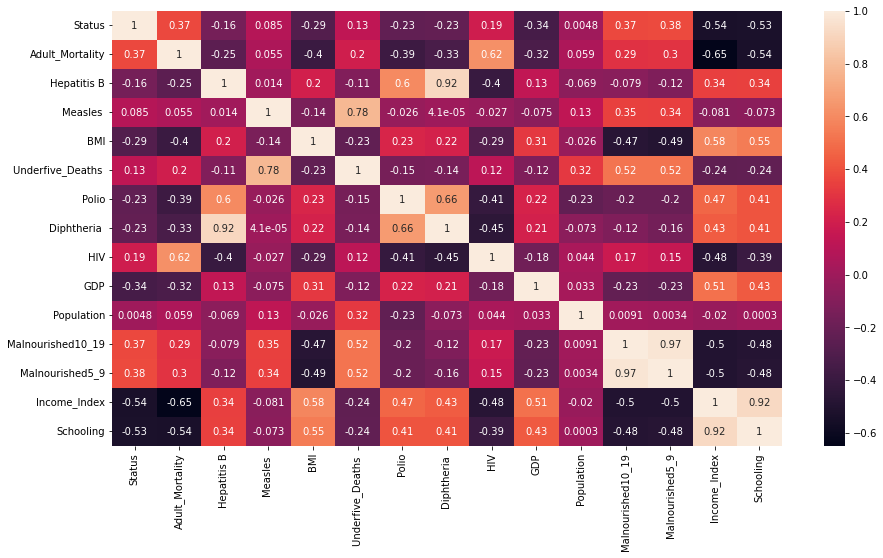

In [85]:
df_features = df.iloc[:,:15]
sns.heatmap(df_features.corr(),annot=True)

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
# type your code here
X = df.iloc[:,:15]


# set the dependent variable
y = df['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [91]:
ridge = Ridge(alpha=5.5)
ridge_model = ridge.fit(X_train, y_train)

In [92]:
# Train
train_pred = ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)

0.3528


In [93]:
# Test
test_pred = ridge_model.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.3533


In [ ]:
# Ridge

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
# type your code here
# type your code here
X = df.iloc[:,[2,3,6,7,8]]


# set the dependent variable
y = df['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [95]:
ridge = Ridge(alpha=1.5)
ridge_model = ridge.fit(X_train, y_train)

In [96]:
# Train
train_pred = ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)

0.7101


In [97]:
# Test
test_pred = ridge_model.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.7136


In [98]:
X = df.iloc[:,[2,3,6,7,8]]
X = sm.add_constant(X)
y = df['Life_Expectancy']

MLR_model3 = sm.OLS(y_train,X_train).fit()

In [100]:
# Train
train_pred = MLR_model3.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)

0.7102


In [101]:
# Test
test_pred = MLR_model3.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.7117


In [102]:
MLR_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_Expectancy   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              26.39
Date:                Sun, 19 Mar 2023   Prob (F-statistic):                    1.87e-18
Time:                        12:18:25   Log-Likelihood:                         -148.59
No. Observations:                 138   AIC:                                      307.2
Df Residuals:                     133   BIC:                                      321.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1130      0.138     -0.821      0.413      -0.385       0.159
x2            -0.0663      0.057     -1.168      0.245      -0.179       0.046
x3             0.2707      0.081      3.355      0.001       0.111       0.430
x4             0.2251      0.156      1.441      0.152      -0.084       0.534
x5            -0.4345      0.065     -6.673      0.000      -0.563      -0.306
==============================================================================
Omnibus:                        7.053   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.767
Skew:                          -0.457   Prob(JB):                       0.0339
Kurtosis:                       3.584   Cond. No.                         5.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
X = df.iloc[:,[3,8,12,11]]
X = sm.add_constant(X)
y = df['Life_Expectancy']

MLR_model4 = sm.OLS(y_train,X_train).fit()

In [117]:
# type your code here
# type your code here
X = df.iloc[:,[3,8,12,11]]


# set the dependent variable
y = df['Life_Expectancy']

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, test_size = 0.2)

In [118]:
lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(X_train, y_train)

In [119]:
MLR = LinearRegression()
lin_model = MLR.fit(X_train, y_train)

In [120]:
# Train
train_pred = lin_model.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)
# Test
test_pred = lin_model.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.6853
0.7967


In [121]:
# Train
train_pred = lasso_model.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)
# Test
test_pred = lasso_model.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

1.0039
0.9813


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [123]:
# type your code here
# type your code here
# type your code here
X = df.iloc[:,:15]


# set the dependent variable
y = df['Life_Expectancy']

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [124]:
e_net = ElasticNet(alpha=0.1,l1_ratio=0.001)
e_net_model = e_net.fit(X_train, y_train)

In [125]:
# Train
train_pred = e_net_model.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)
# Test
test_pred = e_net_model.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.3581
0.3544


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [126]:
# type your code here
# type your code here
# type your code here
X = df.iloc[:,:15]


# set the dependent variable
y = df['Life_Expectancy']

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [127]:
MLR1 = LinearRegression()
lin_model1 = MLR1.fit(X_train, y_train)

In [128]:
# Train
train_pred = lin_model1.predict(X_train)

mse_train = mean_squared_error(y_train,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print(rmse_train)
# Test
test_pred = lin_model1.predict(X_test)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print(rmse_test)

0.35
0.3606


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
# type your code here
X = df.iloc[:,:15]


# set the dependent variable
y = df['Life_Expectancy']

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [132]:
tuned_param = [{'alpha':[7,8,9,10,11]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge,param_grid=tuned_param,cv=5)
ridge_grid.fit(X_train,y_train)

print(ridge_grid.best_params_)

{'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
# type your code here
X = df.iloc[:,:15]


# set the dependent variable
y = df['Life_Expectancy']

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [134]:
tuned_param = [{'alpha':[7,8,9,10,11]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso,param_grid=tuned_param,cv=5)
lasso_grid.fit(X_train,y_train)

print(lasso_grid.best_params_)

{'alpha': 7}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [136]:
# type your code here
X = df.iloc[:,[3,8,11,12]]
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [137]:
tuned_param = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
e_net1 = ElasticNet()
enet_grid = GridSearchCV(estimator=e_net1,param_grid=tuned_param,cv=5)
enet_grid.fit(X_train,y_train)

print(enet_grid.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.9}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [143]:
tuned_param = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]
e_net2 = ElasticNet(alpha=0.8)
enet_grid2 = GridSearchCV(estimator=e_net2,param_grid=tuned_param,cv=5)
enet_grid2.fit(X_train,y_train)

print(enet_grid2.best_params_)

{'l1_ratio': 1}
